In [2]:
import pandas as pd

dfPath = r'fashion-mnist_train.csv'
trainData = pd.read_csv(dfPath)
dfPath = r'fashion-mnist_test.csv'
testData = pd.read_csv(dfPath)
print(trainData.head())
# checking how the data looks

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

In [3]:
# Check if any rows have null values
null_rows = trainData.isnull().any(axis=1)
print('Number of rows with null values:', sum(null_rows))
#  There were no null values

# Check if there is any duplicate rows
duplicate_rows = trainData[trainData.duplicated()]
print("Number of duplicate rows: ", len(duplicate_rows))


Number of rows with null values: 0
Number of duplicate rows:  43


In [4]:
# getting rid of duplicate rows
trainData = trainData.drop_duplicates()

# Check if problem is solved
duplicate_rows = trainData[trainData.duplicated()]
print("Number of duplicate rows: ", len(duplicate_rows))

Number of duplicate rows:  0


In [5]:
#check for imbalancement
class_counts = trainData['label'].value_counts()

# Printing the number of members in each class
print(class_counts)

#our data is balanced

5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: label, dtype: int64


In [7]:
X_train = trainData.drop(columns=['label'])
y_train = trainData['label']
X_test = testData.drop(columns=['label'])
y_test = testData['label']

In [11]:
# find the max and the min of data
print(X_train.max())
print(X_train.min())

#as you can see we have a range of (0,255) for our data 
#so we perform normalization

pixel1       16
pixel2       36
pixel3      226
pixel4      164
pixel5      227
           ... 
pixel780    255
pixel781    255
pixel782    255
pixel783    255
pixel784    170
Length: 784, dtype: int64
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


In [13]:
#min value of all columns
min_value = X_train.min().min()
#max value of all columns
max_value = X_train.max().max()

# Perform min-max normalization
X_train = (X_train - min_value) / (max_value - min_value)

#please concider we should do this for our test data too

X_test = (X_test - min_value) / (max_value - min_value)

In [19]:
import numpy as np

#PCA

def myPCA(X, k):
    # STEP 1: Normalizing
    mean = np.mean(X, axis=0)
    X_mean = X - mean

    # STEP 2: Covariance matrix
    covariance = np.cov(X_mean.T)

    # STEP 3: Eigenvalues and eigenvectors
    eig_val, eig_vec = np.linalg.eig(covariance)

    # Sorting them in descending order
    index = eig_val.argsort()[::-1]
    eig_vec = eig_vec[:, index]

    # Applying dimensionality reduction
    answer = X_mean @ eig_vec[:, :k]

    return answer

PCA_components = myPCA(X_train,3)


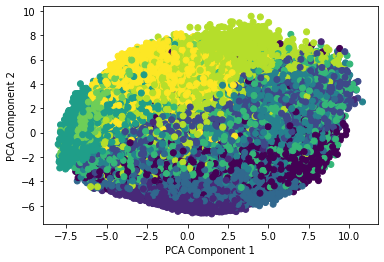

In [15]:
# 2d visualization

import matplotlib.pyplot as plt

plt.scatter(PCA_components[0], PCA_components[1], c=y_train)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


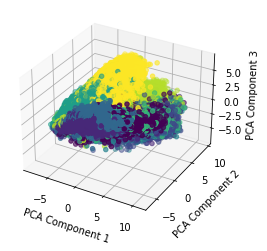

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_components[0],PCA_components[1], PCA_components[2], c=y_train)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

In [56]:
from sklearn.decomposition import PCA

my_pca_ans = myPCA(X_train, 3)
pca = PCA(n_components=3)
sklearn_pca = pca.fit_transform(X_train)

print(my_pca_ans)
print(sklearn_pca)
#as it's clear, the results of the pca is the same!
# we just need to show it by code

my_pca = my_pca_ans.values

#They're only different in signs which is covered in the report

signs_match = np.all(np.sign(my_pca) == np.sign(sklearn_pca), axis=0)

# Adjust signs for columns that do not match
for i, match in enumerate(signs_match):
    if not match:
        my_pca[:, i] *= -1

sklearn_pca = np.round(sklearn_pca, decimals=4)
my_pca = np.round(my_pca, decimals=4)

# Compare the results

print("Are the results equal?", np.allclose(sklearn_pca, my_pca,  atol=1e-4))



              0         1         2
0      3.686147  4.960575  0.049794
1     -4.376604  3.859403  1.949315
2      7.265298  1.569918 -2.315191
3      3.228979 -2.325054  0.649587
4      4.148112 -4.039208  1.513174
...         ...       ...       ...
59995  0.017142  5.187802  5.057856
59996 -3.113472 -5.212777  0.104461
59997  2.181811  0.451604  0.558415
59998  1.469619  6.063090  0.625137
59999 -3.571684  4.769195  0.263435

[59957 rows x 3 columns]
[[ 3.68614723  4.96057532 -0.04979422]
 [-4.37660407  3.8594032  -1.94931515]
 [ 7.26529844  1.56991795  2.31519066]
 ...
 [ 2.18181149  0.45160356 -0.558415  ]
 [ 1.46961945  6.06308951 -0.62513733]
 [-3.57168421  4.76919486 -0.26343514]]
Are the results equal? True


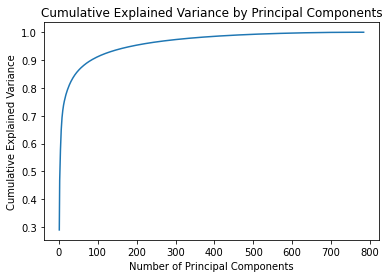

In [57]:
# cause our pca is just the same we can use sklearn pca to answer the questions

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

In [65]:
#Finding the features with the greatest contribution

eigenvectors = pca.components_

feature_contributions = {}

for i, component in enumerate(eigenvectors):
    sorted_indices = np.argsort(np.abs(component))[::-1]
    sorted_features = X_train.columns[sorted_indices]    
    for j in range(5):  # Consider top 5 features
        feature = sorted_features[j]
        if feature in feature_contributions:
            feature_contributions[feature] += 1
        else:
            feature_contributions[feature] = 1
            
sorted_features = sorted(feature_contributions, key=feature_contributions.get, reverse=True)
top_features = sorted_features[:5]

# Print the top 5 features and their total contributions
print("Top 5 Features")
for feature in top_features:
    print(f"Feature: {feature}")

Top 5 Features
Feature: pixel16
Feature: pixel295
Feature: pixel42
Feature: pixel13
Feature: pixel270
